<a href="https://colab.research.google.com/github/neha-r3101/ML-LAB1/blob/main/classification_of_cars_using_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
        print(os.path.join(dirname))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Convolution2D,MaxPooling2D,Flatten #action detectionimport tensorflow
import tensorflow as tf
import matplotlib.pyplot as plt
from IPython.display import HTML

Saving archive.zip to archive (1).zip
Dataset extracted to: /content/cars-dataset
Directory: /content/cars-dataset
Directory: /content/cars-dataset/Cars Dataset
Directory: /content/cars-dataset/Cars Dataset/test
Directory: /content/cars-dataset/Cars Dataset/test/Mahindra Scorpio
    89.jpg
    400.jpg
    265.jpg
    111.jpg
    432.jpg
Directory: /content/cars-dataset/Cars Dataset/test/Hyundai Creta
    214.jpg
    178.jpg
    111.jpg
    99.jpg
    205.jpg
Directory: /content/cars-dataset/Cars Dataset/test/Tata Safari
    89.jpg
    214.jpg
    407.jpg
    384.jpg
    647.jpg
Directory: /content/cars-dataset/Cars Dataset/test/Audi
    1060.jpg
    1084.jpg
    54.jpg
    684.jpg
    1107.jpg
Directory: /content/cars-dataset/Cars Dataset/test/Swift
    340.jpg
    265.jpg
    594.jpg
    384.jpg
    676.jpg
Directory: /content/cars-dataset/Cars Dataset/test/Rolls Royce
    178.jpg
    301.jpg
    392.jpg
    111.jpg
    148.jpg
Directory: /content/cars-dataset/Cars Dataset/test/Toyota

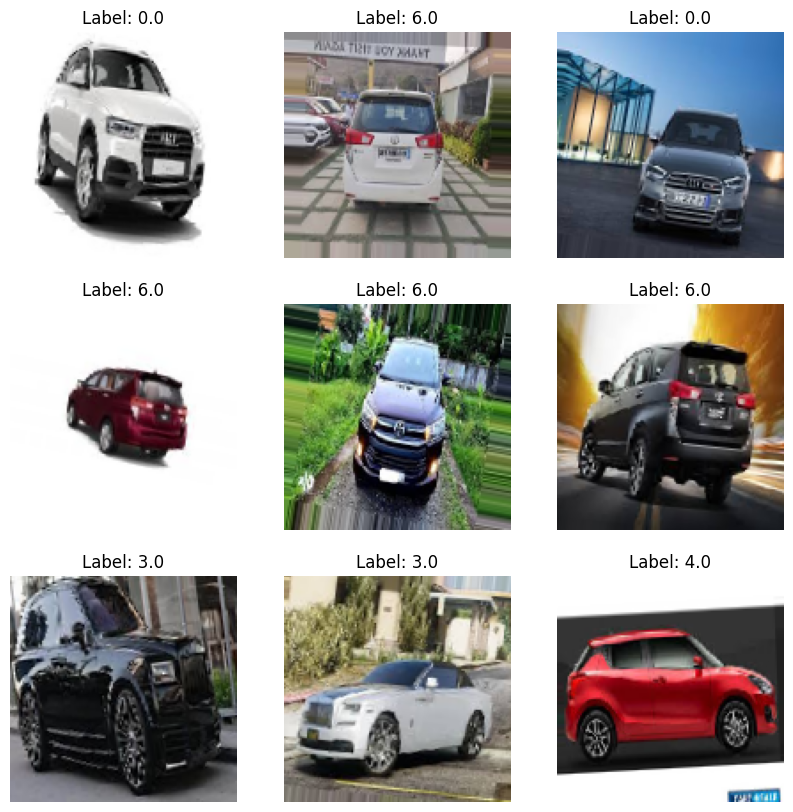

In [4]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Convolution2D, MaxPooling2D, Flatten
import matplotlib.pyplot as plt
from zipfile import ZipFile

# Step 1: Upload the dataset
from google.colab import files
uploaded = files.upload()  # Manually upload 'archive.zip'

# Step 2: Extract the zip file
import shutil
zip_file_name = 'archive.zip'  # Ensure this matches the uploaded file name
extracted_folder = '/content/cars-dataset'

with ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder)

print("Dataset extracted to:", extracted_folder)

# Step 3: Check extracted directory structure
for dirname, _, filenames in os.walk(extracted_folder):
    print("Directory:", dirname)
    for filename in filenames[:5]:  # Limit to 5 files for display
        print("   ", filename)

# Parameters
IMAGE_SIZE = 128
BATCH_SIZE = 32

# Step 4: Set up ImageDataGenerator for training
train_datagen = ImageDataGenerator(
    rescale=1./255,          # Normalize pixel values
    rotation_range=10,       # Random rotation
    horizontal_flip=True,    # Random horizontal flip
    zoom_range=0.2           # Random zoom
)

# Step 5: Point the train generator to the extracted dataset
train_generator = train_datagen.flow_from_directory(
    os.path.join(extracted_folder, 'Cars Dataset/train'),  # Adjust path if needed
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="sparse",  # Sparse for integer labels
)

# Display class indices
print("Class indices:", train_generator.class_indices)

# Example: Displaying a batch of images
batch_images, batch_labels = next(train_generator)
print("Batch shape:", batch_images.shape)
print("Labels:", batch_labels)

# Plot some images
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(batch_images[i])
    plt.title(f"Label: {batch_labels[i]}")
    plt.axis("off")
plt.show()


In [7]:
# Step 1: Define the model
sz=128
model = Sequential()

# First convolution layer and pooling
model.add(Convolution2D(32, (3, 3), input_shape=(sz, sz, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolution layer and pooling
model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the layers
model.add(Flatten())

# Adding a fully connected layer
model.add(Dense(units=96, activation='relu'))
model.add(Dropout(0.40))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=7, activation='softmax'))  # Softmax for more than 2 classes

# Step 2: Compile the model
model.compile(
    optimizer='adam',  # Adam optimizer for better convergence
    loss='sparse_categorical_crossentropy',  # Suitable for multi-class classification
    metrics=['accuracy']  # Track accuracy during training
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# Set up ImageDataGenerator for testing/validation
test_datagen = ImageDataGenerator(rescale=1./255)  # Normalize pixel values

test_generator = test_datagen.flow_from_directory(
    os.path.join(extracted_folder, 'Cars Dataset/test'),  # Adjust path if needed
    target_size=(sz, sz),  # Same size as training images
    batch_size=32,         # Same batch size as training
    class_mode="sparse",   # Sparse for integer labels
    shuffle=False          # No shuffling for consistent evaluation
)


Found 813 images belonging to 7 classes.


In [12]:
# Set image size
sz = 128

# Step 1: Initialize the CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Convolution2D, MaxPooling2D, Flatten

model = Sequential()

# First convolution layer and pooling
model.add(Convolution2D(32, (3, 3), input_shape=(sz, sz, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolution layer and pooling
model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the layers
model.add(Flatten())

# Adding fully connected layers
model.add(Dense(units=96, activation='relu'))
model.add(Dropout(0.40))  # Dropout for regularization
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=7, activation='softmax'))  # Softmax for multi-class classification

# Display the model summary
model.summary()

# Step 2: Compile the model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

model.compile(
    optimizer=Adam(),  # Adam optimizer
    loss=SparseCategoricalCrossentropy(from_logits=False),  # Use for multi-class classification
    metrics=['accuracy']
)

# Step 3: Train the model
history = model.fit(
    train_generator,            # Training data generator
    validation_data=test_generator,  # Validation data generator
    epochs=50,                  # Number of epochs (adjust as needed)
    verbose=1                   # Display training progress
)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 61, 61, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 28800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 96)                  │       2,764,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 96)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           3,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 7)                   │             231 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,778,375 (10.60 MB)

 Trainable params: 2,778,375 (10.60 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


105/105 ━━━━━━━━━━━━━━━━━━━━ 87s 798ms/step - accuracy: 0.2282 - loss: 2.0056 - val_accuracy: 0.3124 - val_loss: 1.7965
Epoch 2/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 145s 830ms/step - accuracy: 0.3077 - loss: 1.8127 - val_accuracy: 0.3985 - val_loss: 1.6787
Epoch 3/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 137s 775ms/step - accuracy: 0.3461 - loss: 1.7600 - val_accuracy: 0.3985 - val_loss: 1.6212
Epoch 4/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 84s 780ms/step - accuracy: 0.3928 - loss: 1.6659 - val_accuracy: 0.3850 - val_loss: 1.5995
Epoch 5/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 84s 791ms/step - accuracy: 0.4116 - loss: 1.5859 - val_accuracy: 0.4330 - val_loss: 1.4789
Epoch 6/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 84s 788ms/step - accuracy: 0.4550 - loss: 1.4904 - val_accuracy: 0.4883 - val_loss: 1.3722
Epoch 7/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 84s 789ms/step - accuracy: 0.4799 - loss: 1.4387 - val_accuracy: 0.5006 - val_loss: 1.3298
Epoch 8/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 85s 798ms/step - accuracy: 0.5024 - loss: 1.3662 - v

In [13]:
scores = model.evaluate(test_generator)

26/26 ━━━━━━━━━━━━━━━━━━━━ 9s 353ms/step - accuracy: 0.7620 - loss: 0.7084


In [14]:
scores

[0.9303103089332581, 0.707257091999054]

In [15]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [16]:
type(history.history['loss'])

list

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

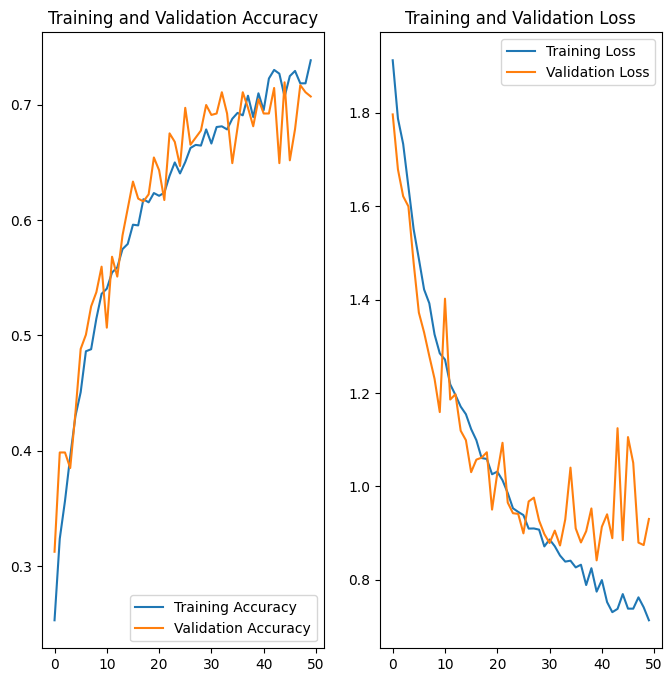

In [18]:
import matplotlib.pyplot as plt
EPOCHS = 50

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [19]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


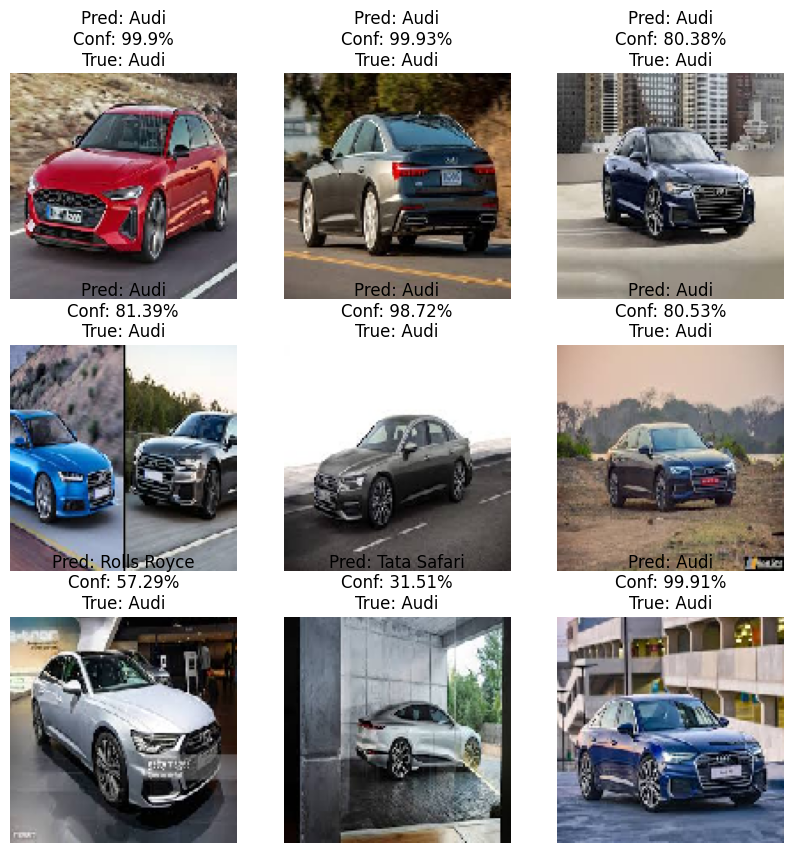

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Define class names from the training generator
class_names = list(train_generator.class_indices.keys())

# Function to predict a single image
def predict(model, img):
    img_array = np.expand_dims(img, axis=0)  # Add batch dimension
    predictions = model.predict(img_array)

    # Get predicted class and confidence
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

# Test the model on a batch of test images
test_images, test_labels = next(test_generator)

plt.figure(figsize=(10, 10))
for i in range(9):  # Display first 9 images in the batch
    plt.subplot(3, 3, i + 1)
    plt.imshow(test_images[i])  # Display the image
    plt.axis("off")

    # Predict the class and confidence
    predicted_class, confidence = predict(model, test_images[i])
    actual_class = class_names[int(test_labels[i])]

    # Display prediction and actual class
    plt.title(f"Pred: {predicted_class}\nConf: {confidence}%\nTrue: {actual_class}")

plt.show()


In [23]:
pip install rembg


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.8 MB/s eta 0:00:00


In [27]:
!pip install onnxruntime


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 81.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 6.4 MB/s eta 0:00:00


In [31]:
from rembg import remove
from PIL import Image
import io

# Input image path
input_image_path = '/content/Benz-297.jpeg'  # Change to your input image path

# Output image path
output_image_path = '/content/output_image.png'  # Ensure this is a valid path

# Open the image file
with open(input_image_path, 'rb') as inp_file:
    input_data = inp_file.read()

# Remove the background
output_data = remove(input_data)

# Save the result
with open(output_image_path, 'wb') as out_file:
    out_file.write(output_data)

print(f"Output image saved at: {output_image_path}")


Output image saved at: /content/output_image.png


In [34]:
import os
import zipfile
import cv2
import numpy as np
from rembg import remove
from PIL import Image

# Paths
zip_file_path = '/content/benz.zip'  # Path to the uploaded ZIP file
extracted_folder = '/content/benz_images'  # Folder to extract images
nested_folder = os.path.join(extracted_folder, 'benz')  # Folder containing actual images
foreground_folder = '/content/foreground_images'  # Folder for background-removed images
red_cars_folder = '/content/red_cars'  # Folder for red cars

# Step 1: Unzip and extract images
os.makedirs(extracted_folder, exist_ok=True)
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder)

# Check if the nested folder exists
if not os.path.exists(nested_folder):
    raise FileNotFoundError(f"Nested folder not found: {nested_folder}")

# Step 2: Create output directories
os.makedirs(foreground_folder, exist_ok=True)
os.makedirs(red_cars_folder, exist_ok=True)

# Function to detect red cars
def is_red_car(image):
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lower_red1 = np.array([0, 120, 70])  # Light red range
    upper_red1 = np.array([10, 255, 255])
    lower_red2 = np.array([170, 120, 70])  # Dark red range
    upper_red2 = np.array([180, 255, 255])

    mask1 = cv2.inRange(hsv_image, lower_red1, upper_red1)
    mask2 = cv2.inRange(hsv_image, lower_red2, upper_red2)
    mask = cv2.bitwise_or(mask1, mask2)

    red_pixels = np.sum(mask > 0)
    total_pixels = mask.size
    red_percentage = (red_pixels / total_pixels) * 100

    return red_percentage > 20

# Save the image with proper mode conversion
def save_image(image, path):
    # Check the mode of the image and convert to RGB if needed
    if image.mode == 'RGBA':
        image = image.convert('RGB')
    # Save as JPEG to ensure compatibility
    image.save(path, format="JPEG")

# Step 3: Process images in the nested folder
image_files = [f for f in os.listdir(nested_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
for image_name in image_files:
    image_path = os.path.join(nested_folder, image_name)

    # Open the image
    input_image = Image.open(image_path)

    # Remove the background
    output_image = remove(input_image)

    # Convert to numpy array for further processing
    output_image_np = np.array(output_image)

    # Check if the image contains a red car
    if is_red_car(output_image_np):
        output_path = os.path.join(red_cars_folder, image_name)
        save_image(output_image, output_path)  # Save with proper mode handling
        print(f"Red car detected and saved: {image_name}")

    # Save the background-removed image
    fg_output_path = os.path.join(foreground_folder, image_name)
    save_image(output_image, fg_output_path)  # Save with proper mode handling
    print(f"Background removed and saved: {image_name}")


Background removed and saved: Benz-25.jpg
Background removed and saved: Benz-205.jpg
Background removed and saved: Benz-57.jpg
Background removed and saved: Benz-256.jpg
Background removed and saved: Benz-305.jpg
Background removed and saved: Benz-137.jpg
Background removed and saved: Benz-109.jpeg
Background removed and saved: Benz-78.jpg
Background removed and saved: Benz-170.jpeg
Background removed and saved: Benz-179.jpg
Background removed and saved: Benz-165.jpeg
Background removed and saved: Benz-18.jpg
Background removed and saved: Benz-101.jpeg
Background removed and saved: Benz-111.jpeg
Background removed and saved: Benz-242.jpg
Background removed and saved: Benz-142.jpg
Background removed and saved: Benz-316.jpg
Background removed and saved: Benz-35.jpg
Background removed and saved: Benz-65.jpg
Background removed and saved: Benz-108.jpeg
Background removed and saved: Benz-317.jpg
Background removed and saved: Benz-311.jpg
Background removed and saved: Benz-27.jpg
Background r

In [42]:
import cv2
import os
import numpy as np
from rembg import remove
import zipfile

# Paths
zip_file_path = '/content/benz.zip'  # Path to the uploaded ZIP file
extracted_folder = '/content/benz_images'  # Folder to extract images
nested_folder = os.path.join(extracted_folder, 'benz')  # Folder containing actual images
foreground_folder = '/content/foreground_images'  # Folder for background-removed images
red_cars_folder = '/content/red_cars'  # Folder for red cars

# Ensure output directories exist
os.makedirs(extracted_folder, exist_ok=True)
os.makedirs(foreground_folder, exist_ok=True)
os.makedirs(red_cars_folder, exist_ok=True)

# Step 1: Unzip and extract images
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder)

# Check if the nested folder exists
if not os.path.exists(nested_folder):
    raise FileNotFoundError(f"Nested folder not found: {nested_folder}")

def remove_background(input_path, output_path):
    """Remove the background from an image."""
    with open(input_path, "rb") as input_file:
        img_data = input_file.read()
    output = remove(img_data)
    with open(output_path, "wb") as output_file:
        output_file.write(output)

def detect_red_car(image_path, red_threshold_ratio=0.05):
    """Detect if a car in the image is red."""
    image = cv2.imread(image_path)
    if image is None:
        return False

    # Convert to grayscale and create a binary mask for non-black areas
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, binary = cv2.threshold(gray, 1, 255, cv2.THRESH_BINARY)
    coords = cv2.findNonZero(binary)
    if coords is None:
        return False

    # Get bounding box around the non-black area
    x, y, w, h = cv2.boundingRect(coords)
    roi = image[y:y+h, x:x+w]

    # Convert to HSV color space
    hsv = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)

    # Define red color ranges in HSV
    lower_red1 = np.array([0, 50, 50])
    upper_red1 = np.array([10, 255, 255])
    lower_red2 = np.array([170, 50, 50])
    upper_red2 = np.array([180, 255, 255])

    # Create masks for red
    mask1 = cv2.inRange(hsv, lower_red1, upper_red1)
    mask2 = cv2.inRange(hsv, lower_red2, upper_red2)
    mask = cv2.bitwise_or(mask1, mask2)

    # Calculate the percentage of red pixels in the ROI
    red_pixels = cv2.countNonZero(mask)
    total_pixels = roi.shape[0] * roi.shape[1]
    red_ratio = red_pixels / total_pixels

    # Check if the red pixel ratio exceeds the threshold
    return red_ratio > red_threshold_ratio

# Step 2: Process all images in the nested folder
for filename in os.listdir(nested_folder):
    if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
        input_path = os.path.join(nested_folder, filename)
        background_removed_path = os.path.join(foreground_folder, filename)

        # Remove background
        remove_background(input_path, background_removed_path)

        # Check for red car
        if detect_red_car(background_removed_path):
            red_car_path = os.path.join(red_cars_folder, filename)
            cv2.imwrite(red_car_path, cv2.imread(background_removed_path))
            print(f"Red car detected and saved: {filename}")
        else:
            print(f"No red car detected in: {filename}")


No red car detected in: Benz-25.jpg
No red car detected in: Benz-205.jpg
No red car detected in: Benz-57.jpg
No red car detected in: Benz-256.jpg
No red car detected in: Benz-305.jpg
No red car detected in: Benz-137.jpg
No red car detected in: Benz-109.jpeg
No red car detected in: Benz-78.jpg
No red car detected in: Benz-170.jpeg
No red car detected in: Benz-179.jpg
No red car detected in: Benz-165.jpeg
No red car detected in: Benz-18.jpg
No red car detected in: Benz-101.jpeg
No red car detected in: Benz-111.jpeg
No red car detected in: Benz-242.jpg
Red car detected and saved: Benz-142.jpg
No red car detected in: Benz-316.jpg
No red car detected in: Benz-35.jpg
No red car detected in: Benz-65.jpg
No red car detected in: Benz-108.jpeg
No red car detected in: Benz-317.jpg
No red car detected in: Benz-311.jpg
No red car detected in: Benz-27.jpg
Red car detected and saved: Benz-306.jpg
No red car detected in: Benz-154.jpeg
No red car detected in: Benz-124.jpg
No red car detected in: Benz-3